In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-price-prediction


In [26]:
!mv -f "{path}/Housing.csv" /content

mv: cannot remove '/kaggle/input/housing-price-prediction/Housing.csv': Read-only file system


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset  'Housing.csv'

df = pd.read_csv('Housing.csv')
print("Dataset loaded successfully!")

print("\nInitial Data Glance:")
print(df.head())
print("\n" + "="*50 + "\n")

print("DataFrame Info:")
df.info()
print("\n" + "="*50 + "\n")

Dataset loaded successfully!

Initial Data Glance:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


DataFrame Info:
<class 'pandas.core.frame.Data

In [28]:
# copy of the DataFrame to perform preprocessing
df_processed = df.copy()

#categorical columns from the previous  output
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
multi_category_col = 'furnishingstatus'

# manual mapping (Label Encoding) for binary 'yes'/'no' columns
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# One-Hot Encoding for the 'furnishingstatus' column
df_processed = pd.get_dummies(df_processed, columns=[multi_category_col], drop_first=True, dtype=int)

print("DataFrame after Preprocessing:")
print(df_processed.head())
print("\n" + "="*50 + "\n")

print("Final DataFrame Info:")
df_processed.info()

DataFrame after Preprocessing:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                          

In [29]:
# Define the features (X) and the target variable (y)
# We will use all numerical columns as features, except for 'price' itself.
# The one-hot encoded columns for 'furnishingstatus' will also be included.
X = df_processed[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                  'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                  'parking', 'prefarea', 'furnishingstatus_semi-furnished',
                  'furnishingstatus_unfurnished']]

# The target variable is the 'price' column
y = df_processed['price']

# training and testing sets
# We'll use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (436, 13)
X_test shape: (109, 13)
y_train shape: (436,)
y_test shape: (109,)


In [30]:
model = LinearRegression()

# train the model using the training data
model.fit(X_train, y_train)

print("Multiple Linear Regression model has been trained successfully!")

Multiple Linear Regression model has been trained successfully!


In [31]:
# predictions on the test set
y_pred = model.predict(X_test)

# evaluation metrics
# MAE is Mean Absolute Error, the average absolute difference between predicted and actual values.
# MSE is Mean Squared Error, the average of the squared differences. It penalizes larger errors more.
# R² (R-squared) measures the proportion of the variance in the target variable that is predictable from the features.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R-squared (R²): 0.65


In [32]:
# model's coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"\nModel Intercept: {model.intercept_:.2f}")

Model Coefficients:
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
mainroad: 367919.95
guestroom: 231610.04
basement: 390251.18
hotwaterheating: 684649.89
airconditioning: 791426.74
parking: 224841.91
prefarea: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06

Model Intercept: 260032.36


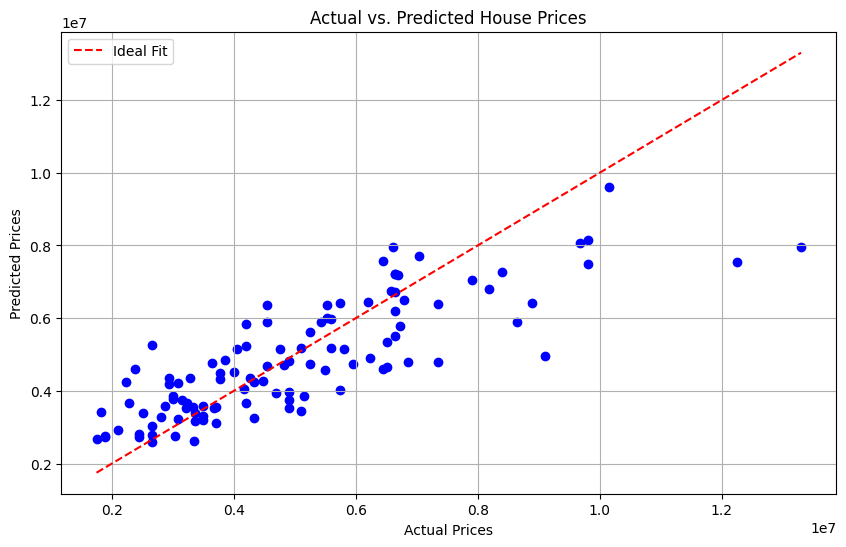

In [33]:
# scatter plot of Actual Prices vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()